# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


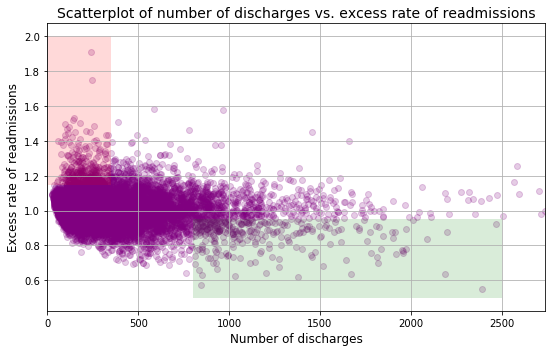

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,color = 'purple',alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

  No     
. The scatter plot above shows that the number of discharges and excess readmission ratio are correlated.       
. Several factors like hospital location, hospital quality, availability of qualified doctors, resources etc. might
  influence readmission ratio.              
. Without any questioning or further reasoning we cannot blindly approve this correlation just from the plot above.   
. Performing some statistical analysis by setting up an appropriate hypothesis test could provide further       understanding of the underlying data.      

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

##   1. Setup an appropriate hypothesis test.

Ho: µ1 = µ2 (Mean excess readmission ratio remains the same for both smaller(<100) and larger(>1000) hosipitals)     
Ha: µ1 ≠ µ2 (Mean excess readmission ratio differs for smaller(<100) and larger(>1000) hospitals)

In [6]:
# View the dataframe
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [7]:
# Clean Excess readmission ration NaN values by subsetting DF
df = clean_hospital_read_df.loc[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]

In [8]:
# View cleaned up dataframe
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


In [9]:
# View info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


Text(0.5, 1.0, 'Smaller Facilities')

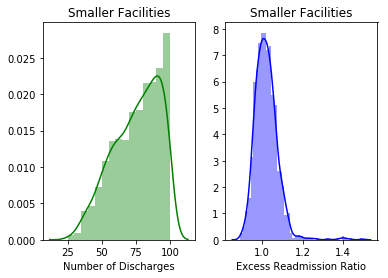

In [10]:
# View plots to see the distribution of number of discharges and excess readmission ratio for smaller facilities
df1 = df[df['Number of Discharges']<=100]
plt.subplot(1,2,1)
sns.distplot(df1['Number of Discharges'], color='g')
plt.title('Smaller Facilities')
plt.subplot(1,2,2)
sns.distplot(df1['Excess Readmission Ratio'], color = 'b')
plt.title('Smaller Facilities')

Text(0.5, 1.0, 'Larger Facilities')

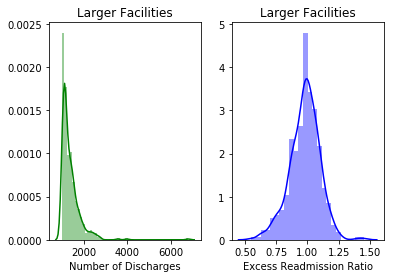

In [11]:
# View plots to see the distribution of number of discharges and excess readmission ratio for larger facilities
df2 = df[df['Number of Discharges']>=1000]
plt.subplot(1,2,1)
sns.distplot(df2['Number of Discharges'], color = 'g')
plt.xlabel('Number of Discharges')
plt.title('Larger Facilities')
plt.subplot(1,2,2)
sns.distplot(df2['Excess Readmission Ratio'], color = 'b')
plt.xlabel('Excess Readmission Ratio')
plt.title('Larger Facilities')

In [12]:
# Subset excess readmission ratio for smaller and larger facilities
large = df2['Excess Readmission Ratio']
small = df1['Excess Readmission Ratio']

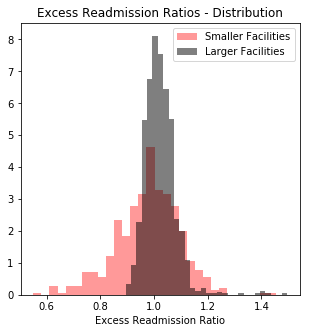

In [13]:
# Histograms
fig = plt.figure(figsize=(5, 5))
_ = plt.hist(large, bins=30, density=True, color='r', alpha=0.4,histtype='stepfilled')
_ = plt.hist(small, bins=30, density=True, color='black', alpha=0.5, histtype='stepfilled')
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.title('Excess Readmission Ratios - Distribution')
_ = plt.legend(('Smaller Facilities', 'Larger Facilities'), loc = 'upper right')


In [14]:
# View count - smaller facilities
df1.count()

Hospital Name                 1223
Provider Number               1223
State                         1223
Measure Name                  1223
Number of Discharges          1223
Footnote                         0
Excess Readmission Ratio      1223
Predicted Readmission Rate    1223
Expected Readmission Rate     1223
Number of Readmissions        1223
Start Date                    1223
End Date                      1223
dtype: int64

In [15]:
# View number of discharges - smaller facilities
df1['Number of Discharges']

1832      25
1699      27
1774      28
1853      29
1290      30
1602      31
2048      33
2441      34
2512      34
2825      34
3828      35
5125      35
3312      35
2378      35
2670      35
2944      35
1238      36
1395      36
3145      37
3207      37
1471      37
1838      37
4092      37
2252      37
3087      37
4317      38
5309      38
2952      38
3406      38
738       39
        ... 
12286    100
3936     100
11276    100
4037     100
5794     100
9932     100
1189     100
4439     100
6955     100
6935     100
6172     100
6871     100
6546     100
434      100
4438     100
2544     100
5535     100
8419     100
8655     100
10763    100
7915     100
8900     100
8902     100
3394     100
11675    100
2580     100
618      100
9038     100
9641     100
7749     100
Name: Number of Discharges, Length: 1223, dtype: int64

In [16]:
# View count - larger facilities
df2.count()

Hospital Name                 464
Provider Number               464
State                         464
Measure Name                  464
Number of Discharges          464
Footnote                        0
Excess Readmission Ratio      464
Predicted Readmission Rate    464
Expected Readmission Rate     464
Number of Readmissions        464
Start Date                    464
End Date                      464
dtype: int64

In [17]:
# View number of discharges - larger facilities
df2['Number of Discharges']

8326     1000
11757    1002
821      1004
2363     1007
7188     1007
2341     1008
7473     1008
12428    1010
12862    1014
359      1014
12181    1015
13032    1017
13493    1017
7155     1018
9806     1019
1166     1019
13082    1020
13006    1020
1653     1021
13547    1021
6252     1021
10655    1023
13285    1023
6646     1023
13674    1023
3816     1024
8424     1025
298      1026
9120     1027
13231    1028
         ... 
7147     2042
897      2060
13326    2089
7872     2106
9444     2112
13723    2189
1605     2190
12910    2196
2758     2198
7934     2209
1352     2278
3042     2314
1448     2318
2846     2341
8249     2353
3202     2388
13730    2393
2440     2430
11545    2469
1805     2476
8818     2509
572      2565
136      2581
1698     2596
1242     2705
8126     2716
6643     2740
1892     3570
13615    3980
13666    6793
Name: Number of Discharges, Length: 464, dtype: int64

In [18]:
# Mean - smaller facilities excess readmission ratio
df1_mean = np.mean(small)
df1_mean

1.0220883892068686

In [19]:
# Mean - larger facilities excess readmission ratio
df2_mean = np.mean(large)
df2_mean

0.9783342672413797

In [20]:
# Mean difference between smaller and larger facilities excess readmission ratio
diff_mean = df1_mean - df2_mean
diff_mean

0.04375412196548889

In [21]:
# Normal test excess readmission ratio- smaller facilities
scipy.stats.normaltest(small)

NormaltestResult(statistic=611.5184051680615, pvalue=1.6235494714232115e-133)

In [22]:
# Normal test excess readmission ratio- larger facilities
scipy.stats.normaltest(large)

NormaltestResult(statistic=16.874954543652645, pvalue=0.00021659587414958752)

In [23]:
# Normal test excess readmission ratio- smaller + larger facilities
scipy.stats.normaltest(df['Excess Readmission Ratio'])

NormaltestResult(statistic=1531.4037674789765, pvalue=0.0)

### run t  and z statistic test with the samples

In [24]:
t, p = ttest_ind(small, large)

In [25]:
print('t-statistic is '+str(t)+' and p value is '+ str(p))

t-statistic is 10.029895332413446 and p value is 4.9142568500221855e-23


In [26]:
from statsmodels.stats import weightstats as stests
z, p = stests.ztest(small, large)

In [27]:
z

10.029895332413446

In [28]:
p

1.126359400704904e-23

##   2. Compute and report the observed significance value (or p-value).

Hacker Statistics - two sample test to compare two sets of data by bootstrapping

In [29]:
#Function to calculate bootstrap replicates.
def draw_bs_reps(data, func, size=1):
    #"""Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [30]:
# Calculate the mean used to shift both the datasets
boot = pd.concat([small,large])
boot_mean = np.mean(boot)
boot_mean

1.0100540604623591

In [31]:
# Create the shifted datasets
shifted_df1 = small - df1_mean + boot_mean
shifted_df2 = large - df2_mean + boot_mean
n=10000

In [32]:
# Draw bootstrap replicates
df1_bs_reps = draw_bs_reps(shifted_df1, np.mean, n)
df2_bs_reps = draw_bs_reps(shifted_df2, np.mean, n)
print(df1_bs_reps)
print(df2_bs_reps)

[1.0090005  1.00798325 1.00793836 ... 1.00837099 1.01217965 1.01121146]
[1.01246053 1.02291096 1.01785384 ... 1.01010923 1.01430945 1.01170557]


In [33]:
# Calculate difference in the replicates
df_bs_reps_diff = df1_bs_reps - df2_bs_reps
print(df_bs_reps_diff)

[-0.00346002 -0.01492771 -0.00991548 ... -0.00173825 -0.0021298
 -0.00049411]


In [34]:
# For difference in mean as the test statistic under the assumption that null hypothesis is true
# Calculate the significance value p and print 
p = np.sum(df_bs_reps_diff >= diff_mean) / n
print('Calculated Significance Value p = '+str(p))

Calculated Significance Value p = 0.0


## 3. Report statistical significance for  𝛼 = .01.

From the above statistics showing p=0.0 which is less than the significance level of 0.01, 
we can reject the null hypothesis and accept the alternate hypothesis which states that there is a 
significant diffrence in the means of excess readmission ratio of smaller and larger facilities.

## 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance that is low p values and practical significance whether or not the difference of data
from the null hypothesis matters for practical considerations are two different things.
Statistical significance shows the results scientifically proven or tested whereas practical significance questions whether or not the results matter or useful.
Low p value of 0.0 shows that out result is statistically significant. On the other hand it seems to be not practically significant. It is impossible under various circumstances for people to only choose larger hospitals to go to and avoid smaller hospitals. Location, maintenance, resources, budget, patients existing health conditions and several other factors could influence excess readmission rate. 
Looking into the historical data and performing analysis to point out the other factors influencing excess readmission ratio could give better understanding of where the focus of improvement should be.

## 5. Look at the scatterplot above. 
### What are the advantages and disadvantages of using this plot to convey information?
### Construct another plot that conveys the same information in a more direct manner.

The scatter plot above clearly shows that the excess readmission ratio is higher in smaller facilities than in larger facilities. The red area clearly shows where the problem lies.
Few other visualizations and analyses could be made to get a much more clear picture of the underlying data.

In [35]:
# Perform a linear regression - smaller facilities
a, b = np.polyfit(df1['Number of Discharges'], df1['Excess Readmission Ratio'], 1)

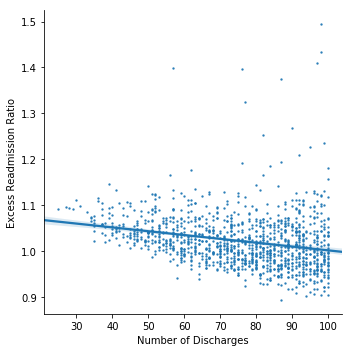

In [36]:
# Plot the regression
sns.lmplot(x = 'Number of Discharges',y = 'Excess Readmission Ratio', data = df1,scatter_kws={"s": 2})

In [37]:
# Perform linear regression - larger facilities
a, b = np.polyfit(df2['Number of Discharges'], df2['Excess Readmission Ratio'], 1)

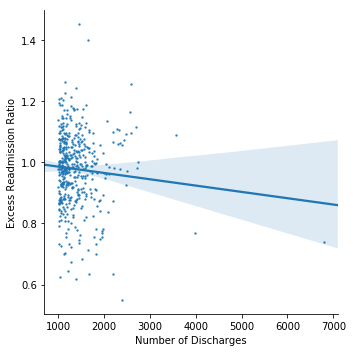

In [38]:
# Plot regression
sns.lmplot(x = 'Number of Discharges',y = 'Excess Readmission Ratio', data = df2,scatter_kws={"s": 2})

In [39]:
# Perform linear regression - all facilities
a, b = np.polyfit(df['Number of Discharges'], df['Excess Readmission Ratio'], 1)

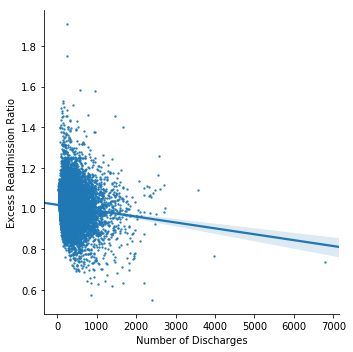

In [40]:
# Plot regression
sns.lmplot(x = 'Number of Discharges',y = 'Excess Readmission Ratio', data = df,scatter_kws={"s": 2})

In [41]:
# Find Pearson correlation coefficient
pearson_r, p_val = scipy.stats.pearsonr(df['Number of Discharges'], df['Excess Readmission Ratio'])
pearson_r

-0.09739794351079353

The Pearson correlation coefficient is close to 0 which shows weak correlation between number of discharges between smaller and larger facilities.

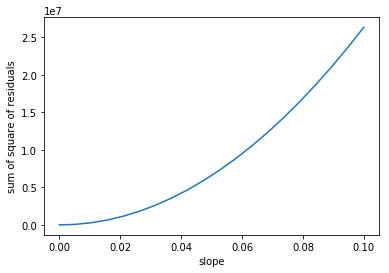

In [42]:
# Residual Plot
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 20)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((df['Excess Readmission Ratio'] - a*df['Number of Discharges'] - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope')
plt.ylabel('sum of square of residuals')

plt.show()


In [43]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

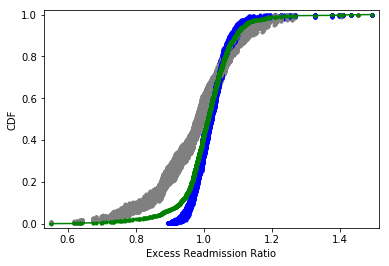

In [44]:
for i in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample_large = np.random.choice(large, size=len(large))
    bs_sample_small = np.random.choice(small, size=len(large))
    # Compute and plot ECDF from bootstrap sample
    x_1000, y_1000 = ecdf(bs_sample_large)
    x_100, y_100 = ecdf(bs_sample_small)
    _ = plt.plot(x_1000, y_1000, marker='.', linestyle='none', color='gray')
    _ = plt.plot(x_100, y_100, marker='.', linestyle='none', color='blue')
# Compute and plot ECDF from original data
x, y = ecdf(boot)
_ = plt.plot(x, y, marker='.', color='g')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

In [45]:
# Calculate Percentage excess readmisson ratio > 1 for smaller facilities
small_excess = small[small>1]
small_per_excess = (len(small_excess)/len(small))*100

In [46]:
small_per_excess

62.632869991823384

In [47]:
# Calculate Percentage excess readmisson ratio > 1 for larger facilities
large_excess = large[large>1]
large_per_excess = (len(large_excess)/len(large))*100

In [48]:
large_per_excess

44.396551724137936

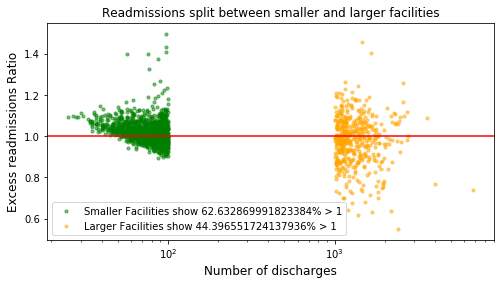

In [49]:
#Set up x, y values for both small and large sets
x_sm = [a for a in df1['Number of Discharges']]
y_sm = small

x_lg = [a for a in df2['Number of Discharges']]
y_lg = large

#Plot the two sets concurrently
fig = plt.figure(figsize=(8,4))
_ = plt.scatter(x_sm, y_sm, alpha=0.5, c='g', s=10, label='Smaller Facilities show '+str(small_per_excess)+'% > 1')
_ = plt.scatter(x_lg, y_lg, alpha=0.5, c='orange', s=10, label='Larger Facilities show '+str(large_per_excess)+'% > 1')
_ = plt.axhline(1.0, c='r')

_ = plt.xlabel('Number of discharges', fontsize=12)
_ = plt.ylabel('Excess readmissions Ratio', fontsize=12)
_ = plt.xscale('log')
_ = plt.legend()
_ = plt.title('Readmissions split between smaller and larger facilities')


This plot above clearly shows high excess readmission ratio in smaller facilities. 
To make practical recommendations other factors influencing readmission must analyzed and tested.